## 경사 하강법 알고리즘을 이용하여 선형 회귀 클래스 만들기
- 모듈 없이 구현하고, 클래스로 만들기

### 0. 데이터 불러오기
- 당뇨병 환자 데이터를 이용

In [1]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
print(diab.data.shape, diab.target.shape)

(442, 10) (442,)


In [2]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

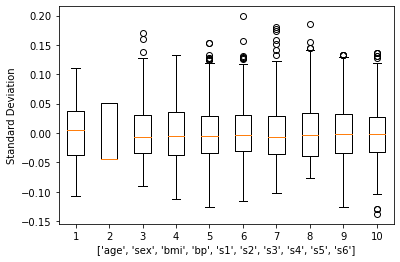

In [4]:
import matplotlib.pyplot as plt
plt.boxplot(diab.data)
plt.xlabel(diab.feature_names)
plt.ylabel('Standard Deviation')
plt.show()

In [5]:
x = diab.data[:,2]
y = diab.target

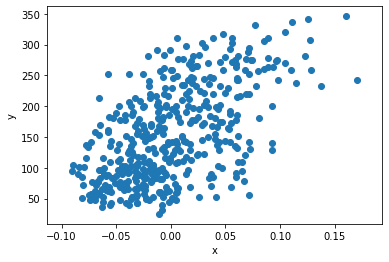

In [6]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1. __init()__ 메서드 작성하기

:메서드에 필요한 변수를 선언하기
- 학습시 가중치 w와 절편 b는 시작 값이 있어야 하므로 임의로 1.0을 지정

In [7]:
def __init__():
    self.w = 1.0
    self.b = 1.0

### 2. 순전파 계산을 위한 메서드 정의
: 

In [8]:
def fwrd(self, x):
    # 선형 방정식 계산
    y_hat = x * self.w + self.b 
    return y_hat

### 3. 역전파 계산을 위한 메서드 정의
:

In [9]:
def bwrd(self, x, err):
    w_grad = x * err # 가중치 w에 대한 gradient
    b_grad = 1 * err # 절편 b에 대한 gradient
    return w_grad, b_grad

### 4. 훈련을 위한 fit() 메서드 구현
- 1. fwrd()를 호출해서 y_hat을 구한다
- 2. 오차를 구한다
- 3. bwrd()를 호출해서 가중치와 절편에 대한 gradient를 구한다
- 4. gradient를 가중치와 절편에서 뺌으로써 가중치와 절편을 업데이트 한다

#### 1~4의 프로세스를 1 Epoch라고 부름

In [10]:
def fit(self, x, y, epochs = 100):
    for i in range(epochs): # Epoch의 크기만큼 반복해라
        for x_i, y_i in zip(x, y): # 모든 샘플에 대해서 반복해라
            y_hat = self.fwrd(x_i) # 순전파 계산하고
            err = -(y_i - y_hat) # 오차를 계산하고
            w_grad, b_grad = self.bwrd(x_i, err) # 역전파 계산하고
            self.w -= w_grad # 가중치 업데이트 해주고
            self.b -= b_grad # 절편 업데이트 해줘라

### 5. 지금까지 작성한 코드 클래스화 하기

In [11]:
class Neuron:
    def __init__(self):
        self.w = 1.0 # 가중치 w 초기화하기
        self.b = 1.0 # 절편 b 초기화하기
    
    def fwrd(self, x):
        y_hat = x * self.w + self.b # 선형 방정식으로 계산하기
        return y_hat
    
    def bwrd(self, x, err):
        w_grad = x * err # 가중치 w에 대한 gradient 계산
        b_grad = 1 * err # 절편 b에 대한 gradient 계산
        return w_grad, b_grad
    
    def fit(self, x, y, epochs = 100):
        for i in range(epochs): # Epoch의 크기만큼 반복해라
            for x_i, y_i in zip(x, y): # 모든 샘플에 대해서 반복해라
                y_hat = self.fwrd(x_i) # 순전파 계산하고
                err = -(y_i - y_hat) # 오차를 계산하고
                w_grad, b_grad = self.bwrd(x_i, err) # 역전파 계산하고
                self.w -= w_grad # 가중치 업데이트 해주고
                self.b -= b_grad # 절편 업데이트 해줘라

### 6. 모델 훈련하기
 - Neuron 클래스의 객채를 생성하고
 - fit() 메서드에 x와 y를 전달
 - 데이터는 당뇨병환자 데이터

In [12]:
neuron = Neuron()
neuron.fit(x, y)

### 7. 학습된 모델의 가중치와 절편 확인하기
- 학습이 완료된 가중치와 절편은 neuron.w와 neuron.b에 저장 되어 있음

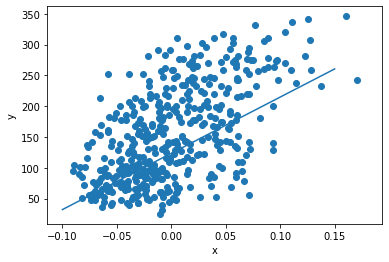

In [13]:
plt.scatter(x, y)
point1 = (-0.1, -0.1 * neuron.w + neuron.b)
point2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([point1[0], point2[0]], [point1[1], point2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

경사 하강법을 적용한 뉴련을 구현이 됨.

이것을 토대로 더 복잡한 딥러닝 알고리즘을 구현 할 수 있음